# 회귀 

여러 개의 독립변수와 한 개의 종속 변수 간의 상관관계를 모델링하는 기법을 통칭



ex> 선형 회귀 식 Y = W1 * X1 + W2 * X2 * ......Wn*Xn

Y는 종속 변수를 

X1, X2 ,.... Xn은 독립 변수를 의미,

W1, W2 ..... Wn은 독립 변수의 값에 영향을 미치는 회귀 계수(Regression coefficients)라고 하낟.

**선형회귀**

회귀 중에서 가장 많이 사용되는 기법이다. 

실제 값과 예측 값의 차이를 최소화하는 직선형 회귀선을 최적화하는 과정 (이후에 규제 방법에 따라 더 세부적으로 나뉜다.)

RSS : 실제값과 예측값의 차이를 나타내는 방식이다.  차이의 총 양을 구할 경우, 부호에 따라서 상쇄되는 경우가 있어,

      오차에 절댓값을 씌우거나, 제곱을 한다. 하지만, 이후 오차 값의 합을 미분하는데에 있어서 편리하게 계산을 하기 위해서 
      
      제곱을 한 것을 더한 것을 뜻한다. 
      
      
RSS는 회귀식의 독립변수(X), 종속변수(Y)가 중심 변수가 아니라, w변수(회귀 계수)가 중심변수임을 인지하는 것이 매우 중요하다.

RSS = 비용 & 비용함수 & 손실함수 (다 동일한 것을 의미한다.)

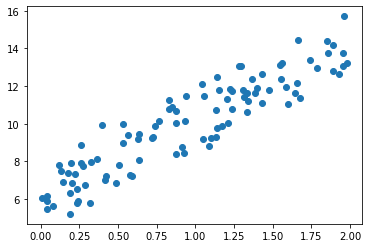

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1 = 4, w0 = 6), 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

#X , y 데이터 세트 산점도로 시각화 
plt.scatter(X, y)

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/ N
    return cost

In [3]:
#w1과 w0을 업데이트 할 w1_update , w0_update를 반환.
def get_weight_updates(w1, w0, X , y, learning_rate = 0.01):
    N = len(y)
    #먼저 w1_update , w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산 
    y_pred = np.dot(X, w1.T) + w0
    diff=  y-y_pred
    
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N, 1))
    
    #w1과 w0을 업데이트 할 w1_update, w0_update 계산 
    w1_update = -(2/N) * learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update , w0_update

In [4]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters= 10000 ):
    #w0와 w1을 모두 0으로 초기화 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1, 1))
    
    #인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1- w1_update 
        w0 = w0 - w0_update
        
    return w1, w0

In [6]:
def get_cose(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y- y_pred))/ N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000) 
print("w1 : {0:.4f} w0 : {1:.4f}".format(w1[0, 0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.0218 w0 : 6.1620
Gradient Descent Total Cost: 0.9935


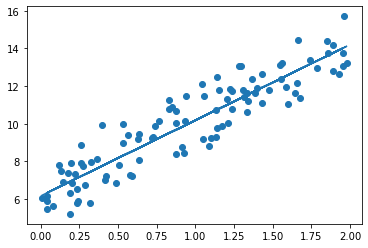

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [10]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost  = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        #전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장 
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update , w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate =0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [11]:
w1, w0 = stochastic_gradient_descent_steps(X, y , iters = 1000)
print("w1 : ", round(w1[0,0], 3), "w0:" , round(w0[0,0], 3))
y_pred  = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 :  4.028 w0: 6.156
Stochastic Gradient Descent Total Cost : 0.9937
